### Step 1: Generate Polynomial Features

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

degree = 3  # Try different values here
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X)  # Transform input features

### Step 2: Train Models with Different Degress

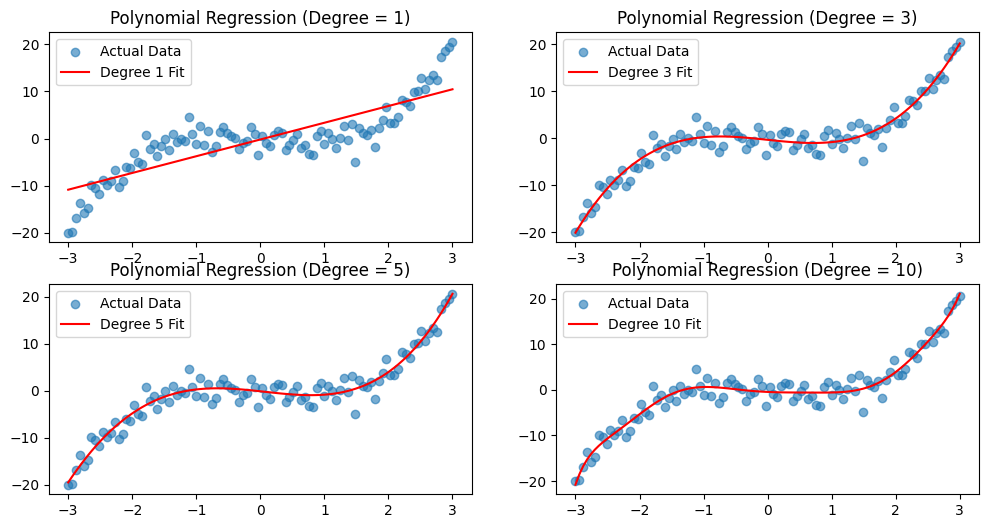

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Sample dataset
np.random.seed(42)
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = X**3 - 2*X + np.random.normal(0, 2, size=X.shape)  # True function + noise

# Try different polynomial degrees
degrees = [1, 3, 5, 10]
plt.figure(figsize=(12, 6))

for i, d in enumerate(degrees, 1):
    poly = PolynomialFeatures(degree=d)
    X_poly = poly.fit_transform(X)
    
    model = LinearRegression()
    model.fit(X_poly, y)
    
    y_pred = model.predict(X_poly)
    
    plt.subplot(2, 2, i)
    plt.scatter(X, y, label="Actual Data", alpha=0.6)
    plt.plot(X, y_pred, color='red', label=f"Degree {d} Fit")
    plt.legend()
    plt.title(f"Polynomial Regression (Degree = {d})")

plt.show()


### Step 3: Use Cross-Validation to Select the Best Degree

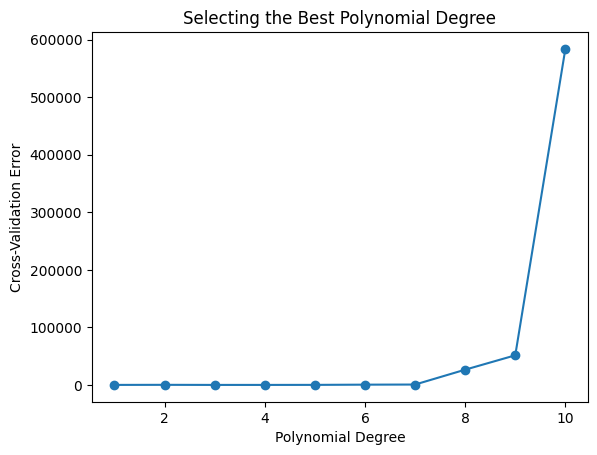

In [3]:
from sklearn.model_selection import cross_val_score

# Try polynomial degrees from 1 to 10
degrees = range(1, 11)
cv_errors = []

for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_poly = poly.fit_transform(X)
    
    model = LinearRegression()
    scores = cross_val_score(model, X_poly, y, cv=5, scoring='neg_mean_squared_error')
    
    cv_errors.append(-scores.mean())  # Convert negative MSE to positive

# Plot Cross-Validation Error vs. Degree
plt.plot(degrees, cv_errors, marker='o')
plt.xlabel("Polynomial Degree")
plt.ylabel("Cross-Validation Error")
plt.title("Selecting the Best Polynomial Degree")
plt.show()
